#REPORT<br>Please Read every commented line in code blocks. It explains each step with values and plot.

[0.6000000000000001, 0.5, 0.4, 0.30000000000000004, 0.2, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001]


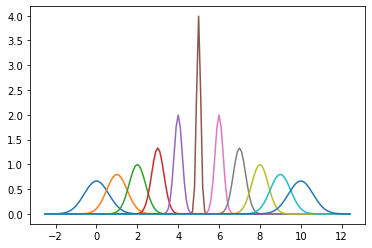

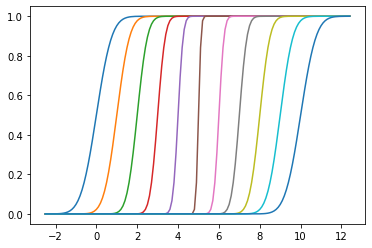

In [ ]:
# Assumed that my thermometer measures discrete integer temperature value between 0 to 10 unit temperature.
# Also here it is assumed that P(E|T) is a Gaussian distribution for every temperature T∈[0,10]
# The Distribution of different temperature is a different Gaussian with different "Standard Deviation".
# This code block gives plots the distributions (pdf & cdf) of error of given T. {T belong to integer between 0 to 10}

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.stats import norm
import statistics

x_axis = np.arange(-2.5, 12.5,  0.1)
T= [0,1,2,3,4,5,6,7,8,9,10]

# Assuming that Standard Deviation for Gaussian plot of error distribution of each temperature depends as SD(i) = sigma*(1+abs(i-5)) for all i belonging to T
SD=[]
sigma = 0.1 #change sigma here and see how it minimize/maximize area
for i in range(0,11):
  SD_i = sigma*(1+abs(i-5))
  SD.append(SD_i)
print(SD)

for i in range(0,11):
  plt.plot(x_axis, norm.pdf(x_axis, T[i],  SD[i]))
plt.show()

for i in range(0,11):
  plt.plot(x_axis, norm.cdf(x_axis, T[i],  SD[i]))
plt.show()

In [ ]:
# Define your error here
# Given that actual temperature is T. Assuming that temperature between (T-valid_range) and (T+valid_range) is valid and outside of that is error. 
valid_range = 0.5

P(E|T) for T = 0 is 0.4046567619272863
P(E|T) for T = 1 is 0.31731050786291415
P(E|T) for T = 2 is 0.2112995473337107
P(E|T) for T = 3 is 0.09558070454562939
P(E|T) for T = 4 is 0.012419330651552318
P(E|T) for T = 5 is 5.733031438470704e-07
P(E|T) for T = 6 is 0.012419330651552318
P(E|T) for T = 7 is 0.09558070454562939
P(E|T) for T = 8 is 0.2112995473337107
P(E|T) for T = 9 is 0.31731050786291415
P(E|T) for T = 10 is 0.4046567619272863


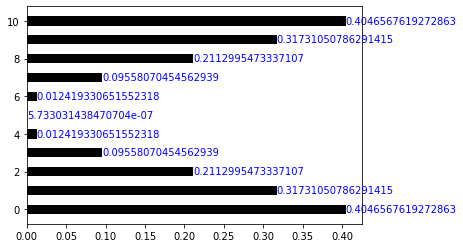

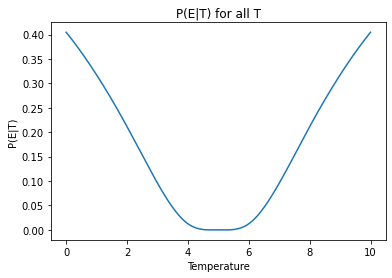

In [ ]:
# This code block gives P(E|T) for every T
# P(E|T) = 1 - [P{(T-valid_range) ≤ X ≤ (T+valid_range)|T}]
P_EgT=[]
for i in range (0,11):
  cdf_upper_limit = norm(T[i] , SD[i]).cdf(T[i]+valid_range)
  cdf_lower_limit = norm( T[i] , SD[i]).cdf(T[i]-valid_range)
  prob =  1-(cdf_upper_limit - cdf_lower_limit)
  P_EgT.append(prob)
  print("P(E|T) for T =" ,i,"is", prob)

fig, ax = plt.subplots()
width = 0.5
ind = np.arange(len(P_EgT))
ax.barh(ind, P_EgT, width, color = "black")
for i, v in enumerate(P_EgT):
    ax.text(v, i -0.15, str(v),
            color = 'blue')
plt.show()

X_Y_Spline = make_interp_spline(T, P_EgT)
X_ = np.linspace(min(T), max(T), 500)
Y_ = X_Y_Spline(X_)

plt.plot(X_, Y_)
plt.title("P(E|T) for all T")
plt.xlabel("Temperature")
plt.ylabel("P(E|T)")
plt.show()

In [ ]:
# Define P(T) here
# Here I have assumed that P(T) is uniform distribution with probability 1/11 since I am working with 11 temperature points
P_T=1/11

P(E) = 0.18932129799502997


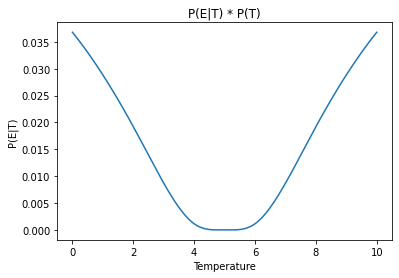

In [ ]:
# This code block gives P(E) of Thermometer
# P(E) = Σ P(E|T) * P(T)
P_E=0
P_E_T=[] # P_E_T[i] = P(E|T[i]) * P(T[i]) {This list is only for storing each summation term for further use}
for i in range(0,11):
  cdf_upper_limit = norm(T[i] , SD[i]).cdf(T[i]+valid_range)
  cdf_lower_limit = norm( T[i] , SD[i]).cdf(T[i]-valid_range)
  prob =  1-(cdf_upper_limit - cdf_lower_limit)
  prev=P_E
  P_E = P_E + (prob)*(P_T)
  P_E_T.append(P_E - prev)
print("P(E) =",P_E)

X_Y_Spline = make_interp_spline(T, P_E_T)
X_ = np.linspace(min(T), max(T), 500)
Y_ = X_Y_Spline(X_)

plt.plot(X_, Y_)
plt.title("P(E|T) * P(T)")
plt.xlabel("Temperature")
plt.ylabel("P(E|T)")
plt.show()

In [ ]:
# Cost of Error Calculation
# Assuming error are of equal cost say 1 unit at every temperature reading
Cost_of_Error = 1
Total_Cost = P_E * Cost_of_Error
print("Total Cost when errors are of equal cost = ",Total_Cost)

# Now Assuming that Cost of Error depends on T as Cost(i) = (i/2+1)/2 for all i belonging to T
Total_Cost=0
for i in range(0,11):
  Cost = ((i/2) + 1)/2
  Total_Cost = Total_Cost + P_E_T[i]*Cost
print("Total Cost when error of cost is temperature dependent = ",Total_Cost)

Total Cost when errors are of equal cost =  0.18932129799502997
Total Cost when error of cost is temperature dependent =  0.33131227149130243


In [ ]:
# Till here it is assumed that error distribution is Gaussian.
# But Now suppose that it is a random distribution whose cdf F(X) is known to us.
# Now it will not be different from what we did here assuming Gaussian distribution.
# Since we have CDF of distribution, we can integrate it from (T-valid_range) to (T+valid_range) and obtain P(E|T) from it.
# Now if we have different distribution at different temperature and we need P(E), then again we do the same thing. Assume P(T) as constant and then integrate each P(E|T) from (T-valid_range) to (T+valid_range).